In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [115]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Survived
Тип : Целевая переменная (таргет).
Значение : Показывает, выжил ли пассажир (1 — выжил, 0 — не выжил).
Значимость : Это наша целевая переменная, которую мы будем предсказывать с помощью модели машинного обучения.
2. Pclass
Тип : Категориальный признак.
Значение : Класс каюты пассажира:
1 — Первый класс (наиболее престижный).
2 — Второй класс.
3 — Третий класс (наименее престижный).
Значимость : Люди из более высоких классов имели большие шансы выжить, так как они находились ближе к спасательным плотам и имели доступ к помощи раньше.
3. Sex
Тип : Категориальный признак.
Значение : Пол пассажира:
male — Мужчина.
female — Женщина.
Значимость : Женщины имели значительно большие шансы выжить, так как следовали принципу "женщины и дети первыми". После one-hot кодирования этот признак преобразуется в числовые значения (Sex_male или Sex_female).
4. Age
Тип : Числовой признак.
Значение : Возраст пассажира в годах.
Значимость : Возраст также играл важную роль: дети и пожилые люди чаще получали приоритет при эвакуации. Этот признак был нормализован для улучшения работы модели.
5. SibSp
Тип : Числовой признак.
Значение : Количество братьев/сестер или супругов на борту.
Значимость : Люди, путешествующие с родственниками, могли иметь больше шансов выжить, так как они могли помогать друг другу. Однако слишком большое количество родственников могло усложнить эвакуацию.
6. Parch
Тип : Числовой признак.
Значение : Количество родителей/детей на борту.
Значимость : Аналогично SibSp, наличие детей или родителей могло повлиять на вероятность спасения.
7. Fare
Тип : Числовой признак.
Значение : Стоимость билета пассажира.
Значимость : Высокая цена билета может быть связана с более высоким классом каюты и, соответственно, лучшими условиями для спасения. Этот признак также был нормализован.
8. Embarked
Тип : Категориальный признак.
Значение : Порт посадки пассажира:
C — Cherbourg (Франция).
Q — Queenstown (Ирландия).
S — Southampton (Великобритания).
Значимость : Пассажиры из разных портов могли оказаться в разных частях корабля или иметь разные характеристики (например, класс каюты), что могло повлиять на их шансы выжить. После one-hot кодирования этот признак преобразуется в числовые значения (Embarked_C, Embarked_Q, Embarked_S).

# Предобработка данных

In [116]:
columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [117]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [118]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


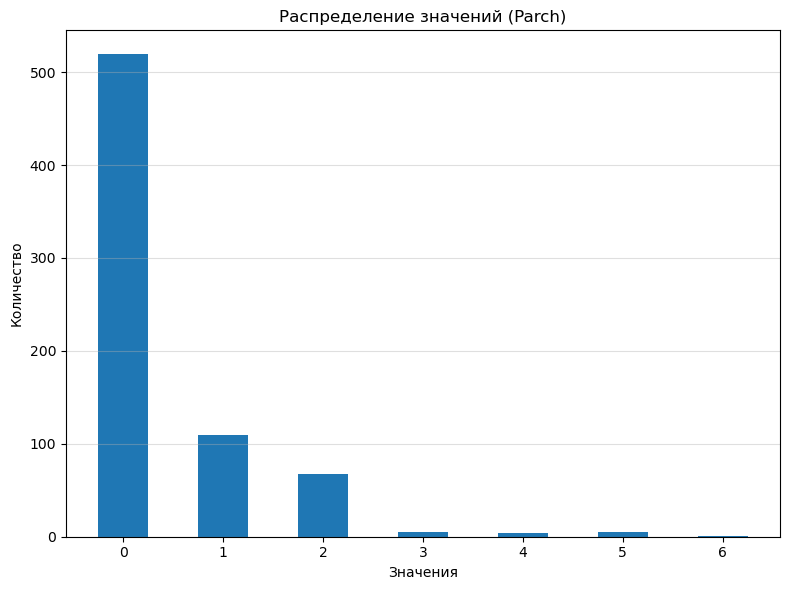

In [119]:
# Считаем количество
value_counts = df['Parch'].value_counts()

# Создаем график
plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts.index, value_counts.values, width=0.5)

# Настройка отображения
plt.title(f'Распределение значений (Parch)')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.xticks(value_counts.index.astype(int), value_counts.index)  # Явно задаем метки

plt.grid(axis='y', alpha=0.4)
plt.tight_layout()

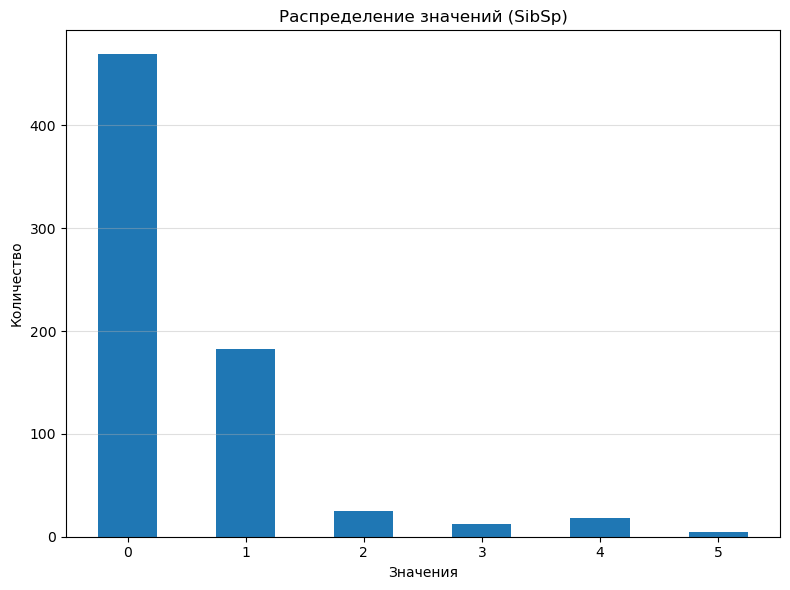

In [120]:
# Считаем количество
value_counts = df['SibSp'].value_counts()

# Создаем график
plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts.index, value_counts.values, width=0.5)

# Настройка отображения
plt.title(f'Распределение значений (SibSp)')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.xticks(value_counts.index.astype(int), value_counts.index)  # Явно задаем метки

plt.grid(axis='y', alpha=0.4)
plt.tight_layout()

In [121]:
# One-hot кодирование категориальных признаков
categorical_features = ['Sex', 'Embarked']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [122]:
# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('Survived', axis=1)
y = df['Survived']


In [123]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2025, stratify=y)

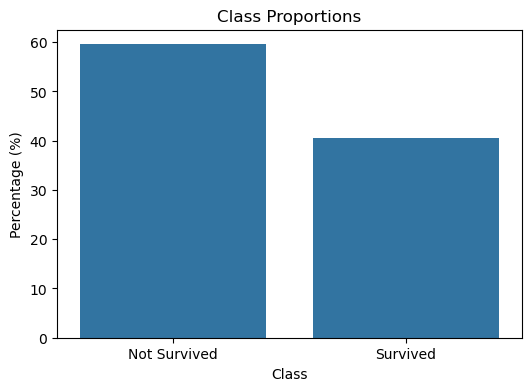

Размер обучающей выборки: (534, 8)
Размер тестовой выборки: (178, 8)


In [124]:
# Визуализация пропорций классов
class_proportions = y.value_counts(normalize=True)
plt.figure(figsize=(6, 4))
sns.barplot(x=class_proportions.index, y=class_proportions.values * 100)
plt.title('Class Proportions')
plt.xlabel('Class')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.show()

# Проверка результатов
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

- Таким образом мы видим дисбаланс класса выживаемости, что не выжило меньше, чем выжило
- Следовательно для оценки качества модели использование таких метрик как accuracy precision recall не целесообразно
Значит, основной метрикой оценки качества модели будет f1-score

In [125]:
# Нормализация числовых признаков
numeric_features = ["Pclass", 'Age', 'SibSp', 'Parch', 'Fare']

scaler = StandardScaler()

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

X_test[numeric_features] = scaler.transform(X_test[numeric_features])



In [126]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
131,0.906012,-0.682203,-0.565474,-0.516159,-0.529030,True,False,True
561,0.906012,0.689953,-0.565474,-0.516159,-0.512548,True,False,True
117,-0.291538,-0.064733,0.565474,-0.516159,-0.257187,True,False,True
92,-1.489089,1.101599,0.565474,-0.516159,0.525700,True,False,True
880,-0.291538,-0.339164,-0.565474,0.677040,-0.159753,False,False,True
...,...,...,...,...,...,...,...,...
676,0.906012,-0.373468,-0.565474,-0.516159,-0.509543,True,False,True
60,0.906012,-0.544987,-0.565474,-0.516159,-0.525537,True,False,False
537,-1.489089,0.003875,-0.565474,-0.516159,1.407482,False,False,False
671,-1.489089,0.072483,0.565474,-0.516159,0.346907,True,False,True


# Создание модели

In [127]:
# 1. Decision Tree
tree_param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [5, 10, 15]}
tree_model = GridSearchCV(DecisionTreeClassifier(random_state=2025), tree_param_grid, cv=5)
tree_model.fit(X_train, y_train)
print("Decision Tree Best Params:", tree_model.best_params_)

# 2. Random Forest
rf_param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [5, 10, 15], 'min_samples_split': [3, 5, 10]}
rf_model = GridSearchCV(RandomForestClassifier(random_state=2025), rf_param_grid, cv=5)
rf_model.fit(X_train, y_train)
print("Random Forest Best Params:", rf_model.best_params_)

# 3. K-Nearest Neighbors (KNN)
knn_param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn_model = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
knn_model.fit(X_train, y_train)
print("KNN Best Params:", knn_model.best_params_)

# 4. Support Vector Machine (SVM)
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_model = GridSearchCV(SVC(random_state=2025), svm_param_grid, cv=5)
svm_model.fit(X_train, y_train)
print("SVM Best Params:", svm_model.best_params_)

# 5. Logistic Regression
logreg = LogisticRegression(random_state=2025)
logreg.fit(X_train, y_train)


Decision Tree Best Params: {'max_depth': 3, 'min_samples_split': 5}
Random Forest Best Params: {'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 50}
KNN Best Params: {'n_neighbors': 9}
SVM Best Params: {'C': 1, 'kernel': 'rbf'}


LogisticRegression(random_state=2025)


--- Decision Tree ---


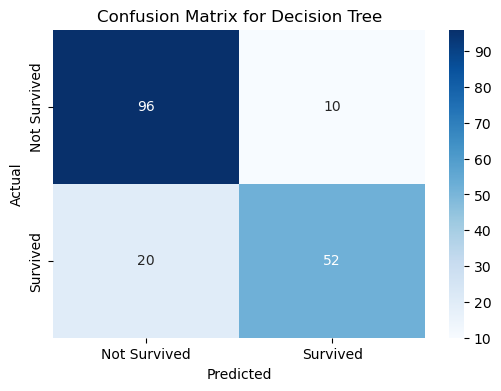

              precision    recall  f1-score   support

           0       0.83      0.91      0.86       106
           1       0.84      0.72      0.78        72

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178


Feature Importances:
      Feature  Importance
5    Sex_male    0.576047
0      Pclass    0.216978
1         Age    0.094555
2       SibSp    0.064253
4        Fare    0.048166
3       Parch    0.000000
6  Embarked_Q    0.000000
7  Embarked_S    0.000000

--- Random Forest ---


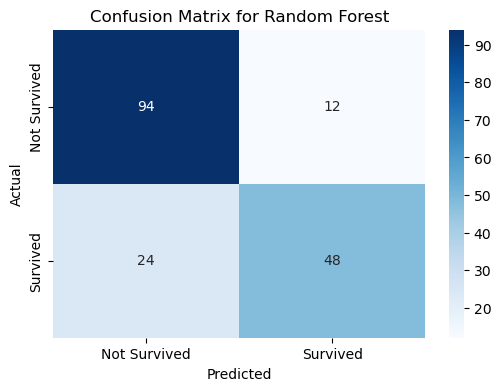

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       106
           1       0.80      0.67      0.73        72

    accuracy                           0.80       178
   macro avg       0.80      0.78      0.78       178
weighted avg       0.80      0.80      0.79       178


Feature Importances:
      Feature  Importance
5    Sex_male    0.378684
4        Fare    0.192418
1         Age    0.159234
0      Pclass    0.128149
3       Parch    0.064257
2       SibSp    0.046859
7  Embarked_S    0.022150
6  Embarked_Q    0.008248

--- KNN ---


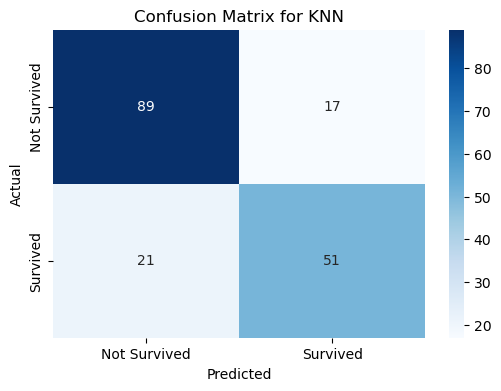

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       106
           1       0.75      0.71      0.73        72

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178


--- SVM ---


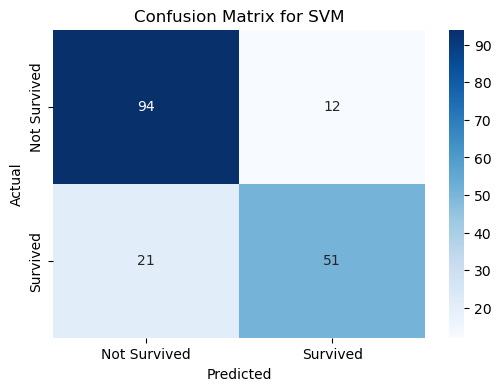

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       106
           1       0.81      0.71      0.76        72

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178


--- Logistic Regression ---


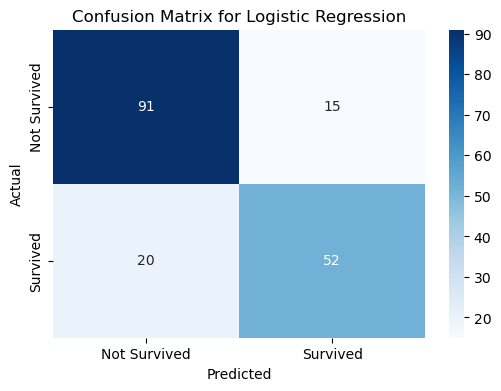

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       106
           1       0.78      0.72      0.75        72

    accuracy                           0.80       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [128]:
# Функция для оценки модели
def evaluate_model(model, name):
    print(f"\n--- {name} ---")
    y_pred = model.predict(X_test)
    
    # Матрица ошибок
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Отчет классификации
    print(classification_report(y_test, y_pred))
    
    # Важность признаков (только для деревьев)
    if hasattr(model, "best_estimator_") and hasattr(model.best_estimator_, "feature_importances_"):
        feature_importances = model.best_estimator_.feature_importances_
        feature_names = X.columns
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        print("\nFeature Importances:")
        print(importance_df)

# Оценка моделей
evaluate_model(tree_model, "Decision Tree")
evaluate_model(rf_model, "Random Forest")
evaluate_model(knn_model, "KNN")
evaluate_model(svm_model, "SVM")
evaluate_model(logreg, 'Logistic Regression')

In [129]:
y_pred_1 = tree_model.predict(X_test)
y_pred_2 = rf_model.predict(X_test)
y_pred_3 = knn_model.predict(X_test)
y_pred_4 = svm_model.predict(X_test)
y_pred_5 = logreg.predict(X_test)

print('F1 score Decision Tree: ', f1_score(y_test, y_pred_1) )
print('F1 score Random Forest ', f1_score(y_test, y_pred_2) )
print('F1 score KNN: ', f1_score(y_test, y_pred_3) )
print('F1 score SVM: ', f1_score(y_test, y_pred_4) )
print('F1 score Logistic Regression: ', f1_score(y_test, y_pred_5) )

F1 score Decision Tree:  0.7761194029850746
F1 score Random Forest  0.7272727272727273
F1 score KNN:  0.7285714285714285
F1 score SVM:  0.7555555555555555
F1 score Logistic Regression:  0.7482014388489209


- Таким образом, среди 5 рассмотренных моделей по метрике f1-score лучше всего себя показала модель Decision Tree